In [1]:
%matplotlib inline
import numpy as np
from astropy import units as u
from plasmapy.mathematics import plasma_dispersion_func, plasma_dispersion_func_deriv
from plasmapy.physics.transport import Coulomb_logarithm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [57]:
logT = np.linspace(1, 7, num=100)
temperatures = 10 ** logT * u.K
density = 1e22 * u.m ** -3
particles = ('e-', 'p+')
methods = ['classical', 'GMS-1', 'GMS-2', 'GMS-3', 'GMS-4', 'GMS-5', 'GMS-6']

#methods = ['classical','GMS-2', 'GMS-3', 'GMS-4', 'GMS-5', ]

ln_Λ_list = []
for method in methods:
    z_mean = 1 if method in ['GMS-2', 'GMS-5', 'GMS-6'] else None
    ln_Λ_list.append(np.array([Coulomb_logarithm(temperature, density, particles, method=method, z_mean=z_mean) 
                      for temperature in temperatures]))


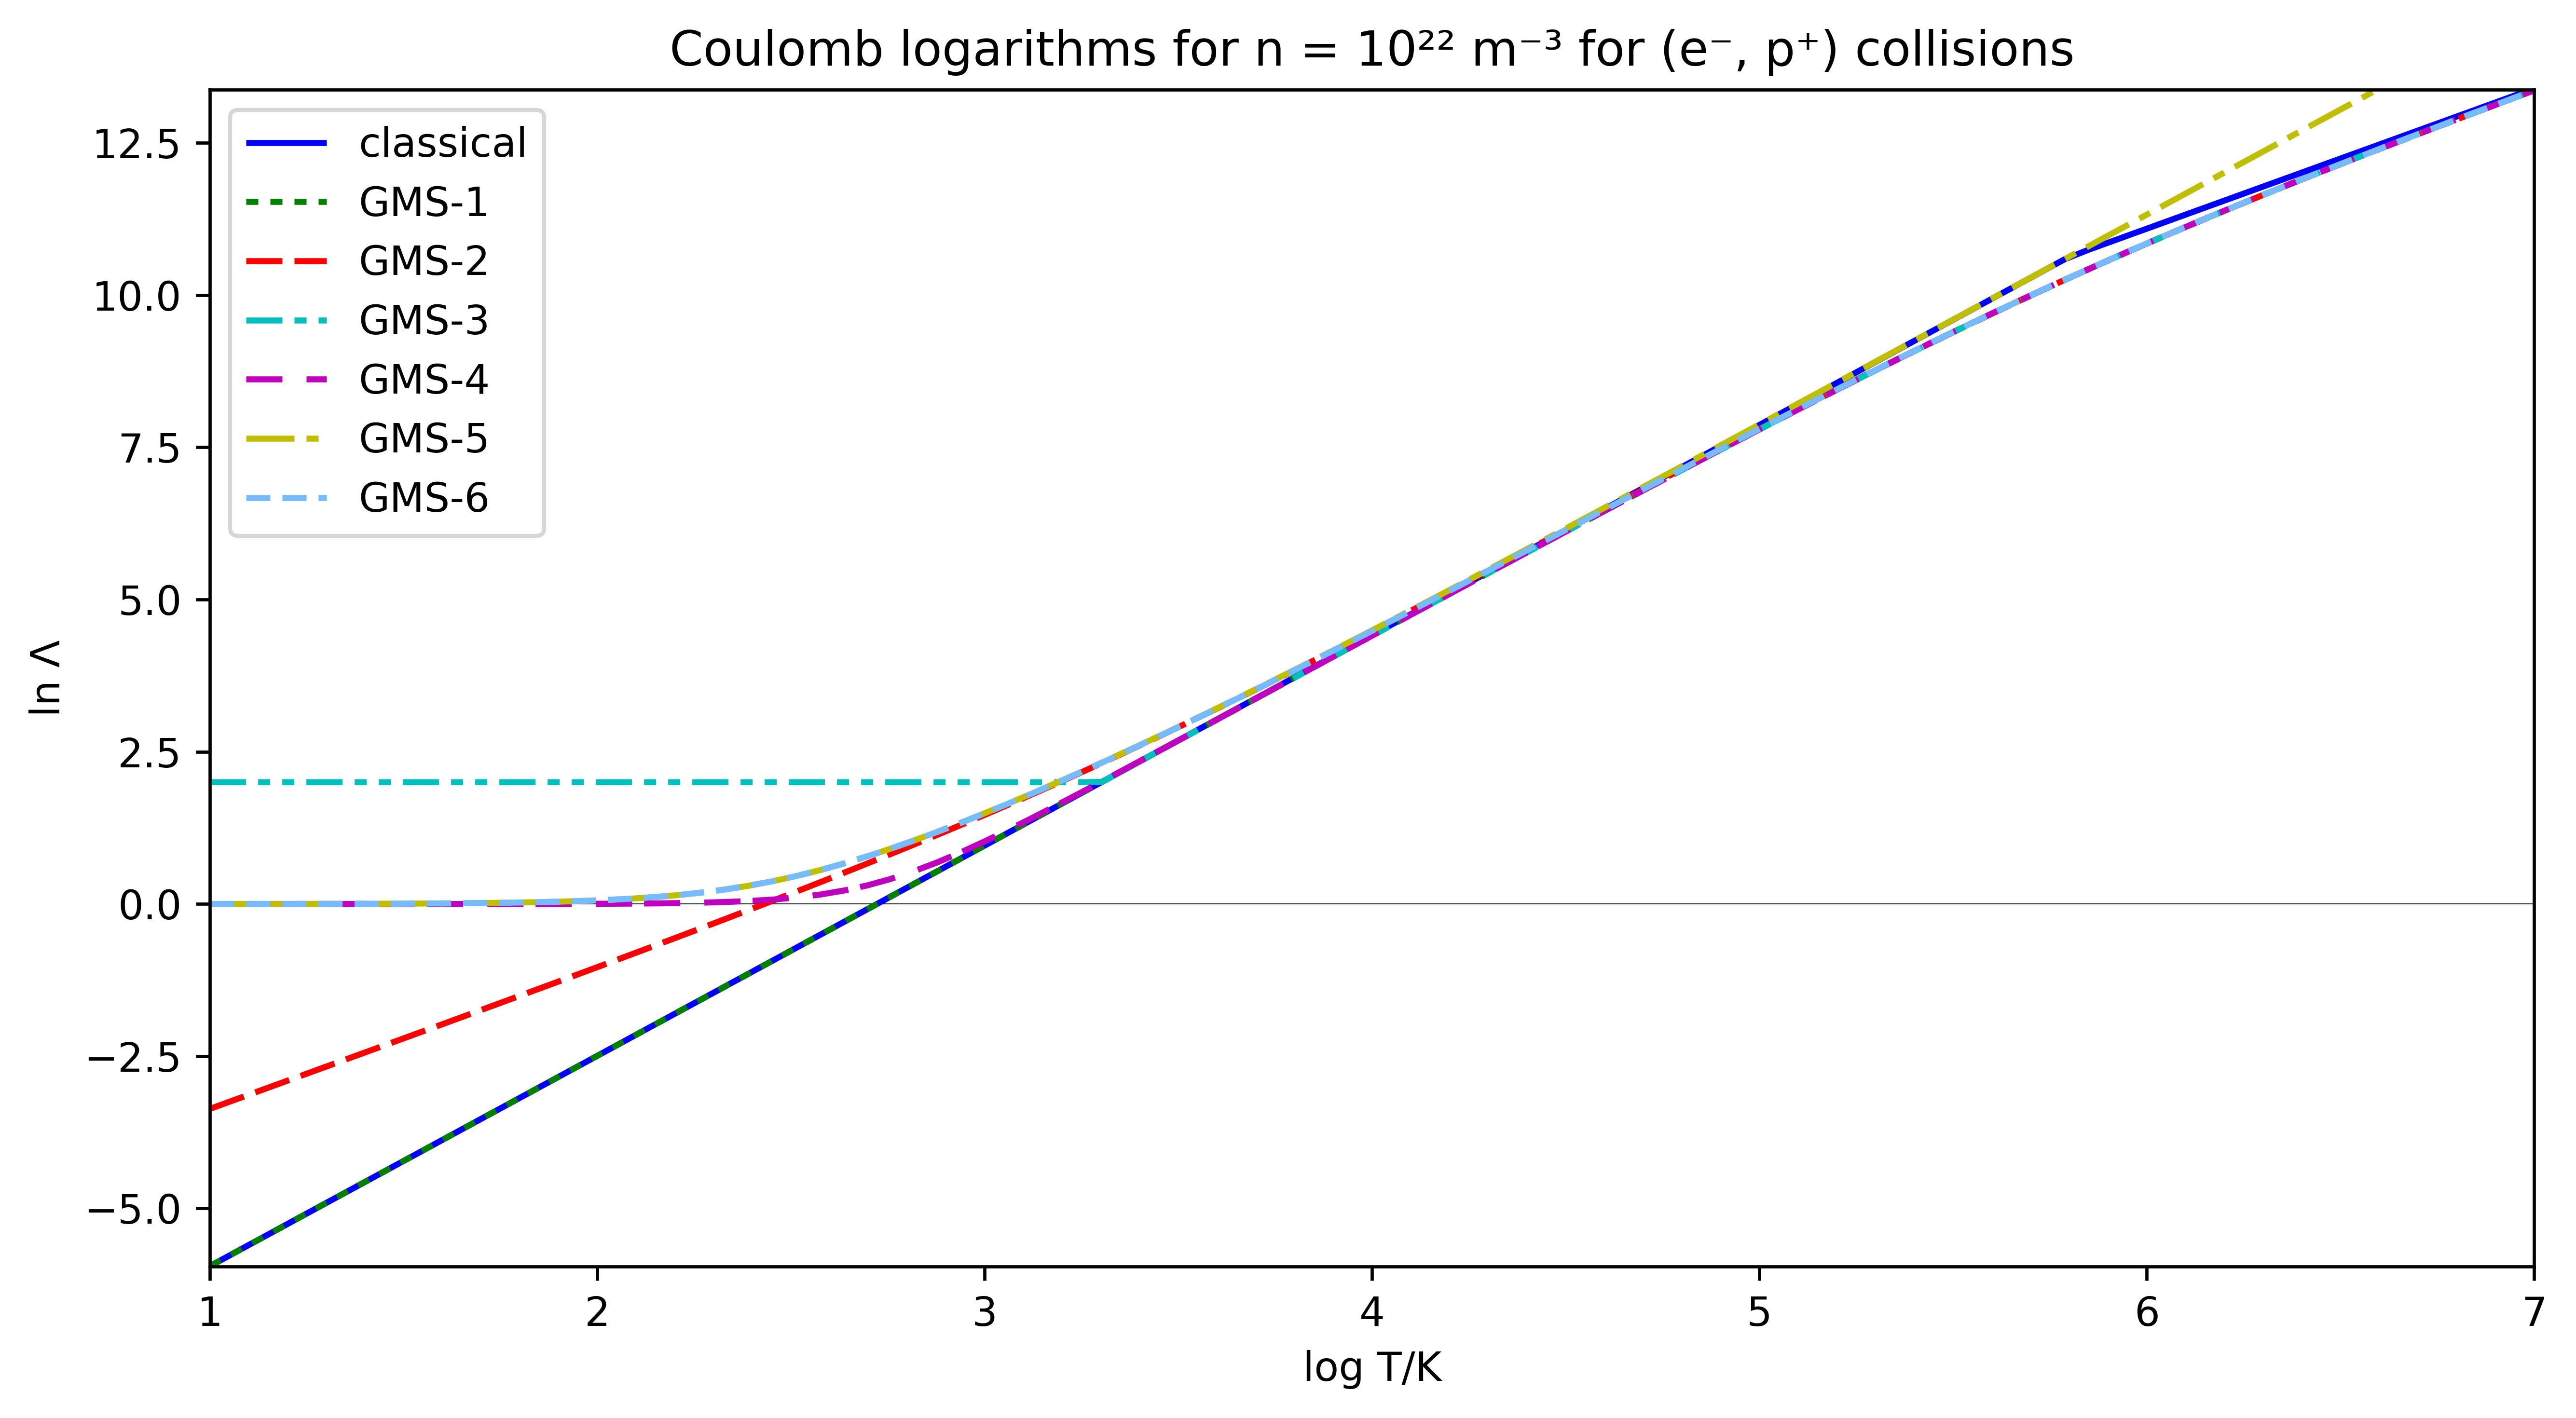

In [59]:
fig = plt.figure(num=1, figsize=(9,5), dpi=600)
ax = fig.add_subplot(111)

ax.plot([logT[0], logT[-1]],[0,0], 'k', linewidth=0.2)

styles = ['-', ':', '--', '-', '-.', ':', ':']

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'xkcd:sky blue']

dasheses = [
    [8, 0],
    [2, 2],
    [6, 2],
    [6, 2, 2, 2, 2, 2],
    [6, 4, 6, 2],
    [8, 2, 2, 2,],
    [4, 2, 4, 2],
]

for ln_Λ, method, dash, color in zip(ln_Λ_list, methods, dasheses, colors):

    ax.plot(
        logT, 
        ln_Λ, 
        dashes=dash,
        label=method, 
        color=color,
    )
    
#ax.set_title('Coulomb Logarithm')
ax.set_xlabel('log T/K')
ax.set_ylabel('ln Λ')

ax.set_xlim([np.min(logT), np.max(logT)])
ax.set_ylim([np.min(ln_Λ_list[0]) - 0.01, np.max(ln_Λ_list[-1]) + 0.01])
ax.legend()

ax.set_title("Coulomb logarithms for n = 10²² m⁻³ for (e⁻, p⁺) collisions")
fig.tight_layout()
fig.savefig('coulomb.pdf')

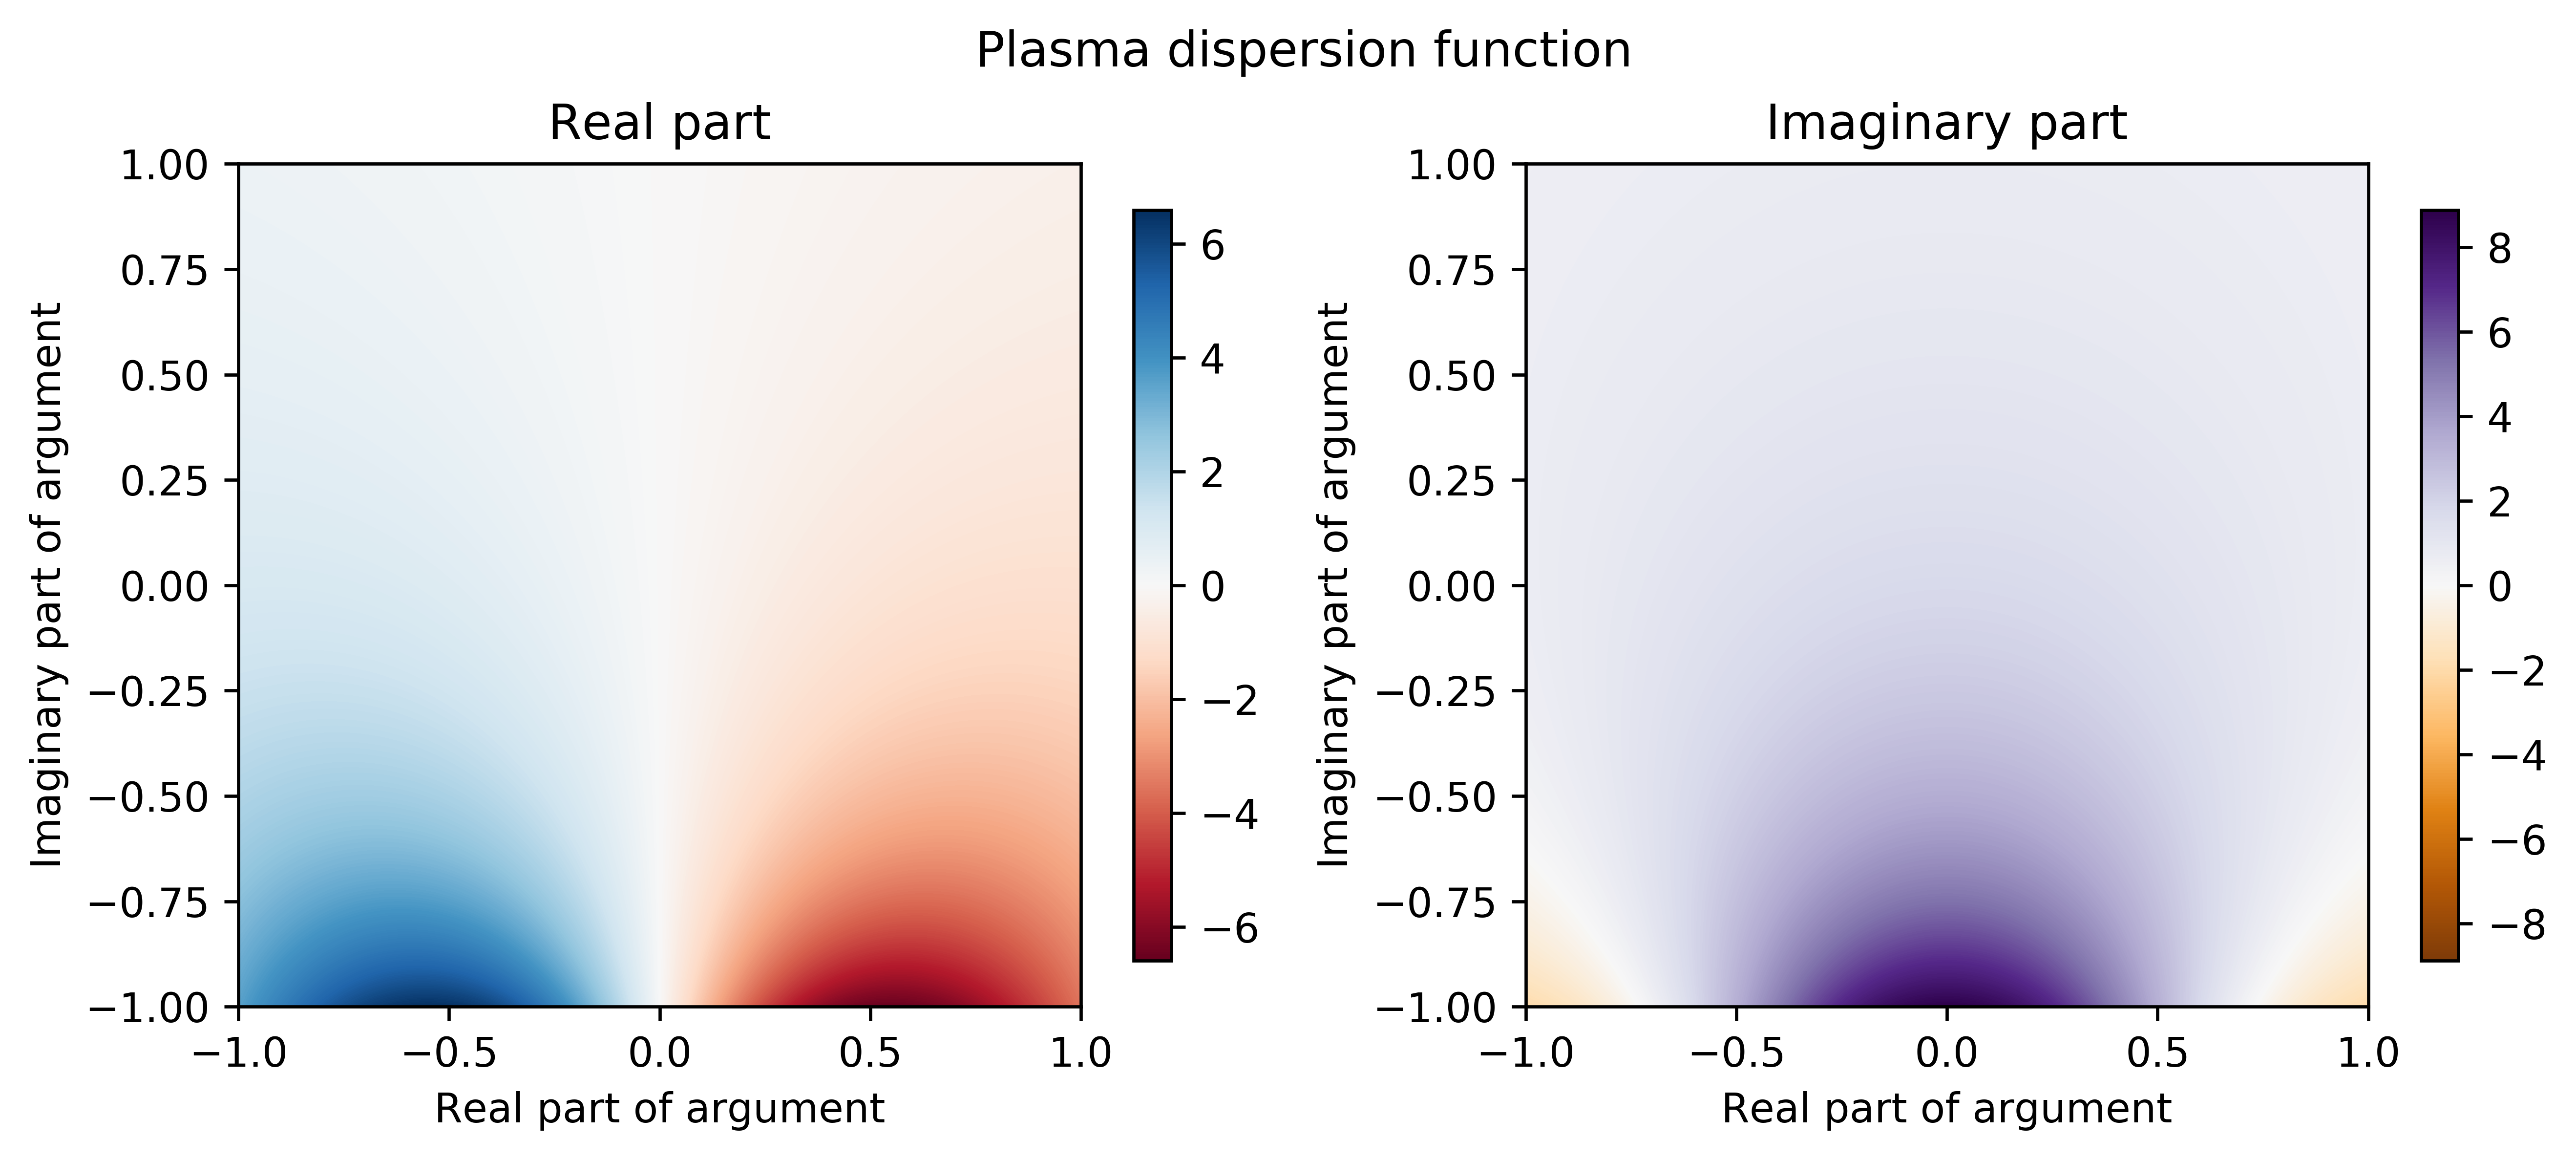

In [202]:
import matplotlib.pyplot as plt
import numpy as np
from plasmapy.mathematics import plasma_dispersion_func

lim = 1
step = lim/200

grid = np.mgrid[-lim:lim+step:step, -lim:lim+step:step]
real_axis, imag_axis = grid[0,:,:], grid[1, :, :]
result = plasma_dispersion_func(real_axis + 1j*imag_axis)

real_range = np.array([result.real.min(), result.real.max()])
imag_range = np.array([result.imag.min(), result.imag.max()])

# Find the contour plot 

maxabsr = np.max(np.abs(result.real))
maxabsi = np.max(np.abs(result.imag))
rlevels = np.linspace(-maxabsr, maxabsr, 600)
ilevels = np.linspace(-maxabsi, maxabsi, 600)

fig2 = plt.figure(figsize=(9,4.1), dpi=600)

fig2.suptitle("Plasma dispersion function")

real_plot = fig2.add_subplot(121)
imag_plot = fig2.add_subplot(122)

rc = real_plot.contourf(real_axis, imag_axis, result.real, levels=rlevels, cmap=plt.cm.RdBu)
ic = imag_plot.contourf(real_axis, imag_axis, result.imag, levels=ilevels, cmap=plt.cm.PuOr)

for ax, c in zip([real_plot, imag_plot], [rc, ic]):
    ax.set_xlabel("Real part of argument")
    ax.set_ylabel("Imaginary part of argument")
    ax.set_aspect("equal")
    fig2.colorbar(c, ax=ax, shrink=0.7, ticks=[-8, -6, -4, -2, 0, 2, 4, 6, 8])

real_plot.set_title("Real part")
imag_plot.set_title("Imaginary part")
    
fig2.tight_layout()

fig2.savefig('plasma_dispersion_function.png')

In [191]:
plt.cm.RdBu.reversed()

In [ ]:
fig.color

In [195]:
plasma_dispersion_func(1j)

0.757872156141312j